<h2 style="text-align:center; color:#1f77b4;">
IMPORT LIBRARIES AND DATASET
</h2>

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns

In [12]:
df = pd.read_csv("bmw_clean.csv")

<h2 style="text-align:center; color:#1f77b4;">
BASIC INSPECTION OF THE DATASET
</h2>

In [3]:
df.shape

(50000, 12)

In [4]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
 11  Revenue               50000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB


In [7]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [8]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue
count,50000,50000,50000,50000,50000,50000
mean,2017,3,100307,75035,5068,380244851
std,4,1,57942,25998,2857,262340599
min,2010,2,3,30000,100,3410472
25%,2013,2,50178,52435,2588,168987092
50%,2017,3,100388,75012,5087,331800999
75%,2021,4,150630,97628,7537,548649400
max,2024,5,199996,119998,9999,1194346154


<h2 style="text-align:center; color:#1f77b4;">
NULLS AND DUPLICATES CHECK
</h2>

In [9]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Revenue                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df[df.duplicated()]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue


<h2 style="text-align:center; color:#1f77b4;">
UNIVARIATE ANALYSIS (CATEGORICAL)
</h2>

In [21]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
cat_cols

['Model',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Sales_Classification']

In [25]:
for col in cat_cols:
    print(f"\n --- {col.upper()}(unique = {df[col].nunique()})---")
    print(df[col].value_counts().head(10))


 --- MODEL(unique = 11)---
Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
Name: count, dtype: int64

 --- REGION(unique = 6)---
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

 --- COLOR(unique = 6)---
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64

 --- FUEL_TYPE(unique = 4)---
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

 --- TRANSMISSION(unique = 2)---
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64

 --- SALES_CLASSIFICATION(unique = 2)---
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


In [29]:
for col in cat_cols:
    print(f"\n---{col.upper()}% DISTRIBUTION---")
    print((df[col].value_counts(normalize = True)*100).round(2))


---MODEL% DISTRIBUTION---
Model
7 Series    9.33
i3          9.24
i8          9.21
3 Series    9.19
5 Series    9.18
X1          9.14
X3          8.99
X5          8.97
M5          8.96
X6          8.96
M3          8.83
Name: proportion, dtype: float64

---REGION% DISTRIBUTION---
Region
Asia             16.91
Middle East      16.75
North America    16.67
Europe           16.67
Africa           16.51
South America    16.50
Name: proportion, dtype: float64

---COLOR% DISTRIBUTION---
Color
Red       16.93
Silver    16.70
Grey      16.70
White     16.61
Black     16.55
Blue      16.52
Name: proportion, dtype: float64

---FUEL_TYPE% DISTRIBUTION---
Fuel_Type
Hybrid      25.43
Petrol      25.10
Electric    24.94
Diesel      24.53
Name: proportion, dtype: float64

---TRANSMISSION% DISTRIBUTION---
Transmission
Manual       50.31
Automatic    49.69
Name: proportion, dtype: float64

---SALES_CLASSIFICATION% DISTRIBUTION---
Sales_Classification
Low     69.51
High    30.49
Name: proportion, dtype:

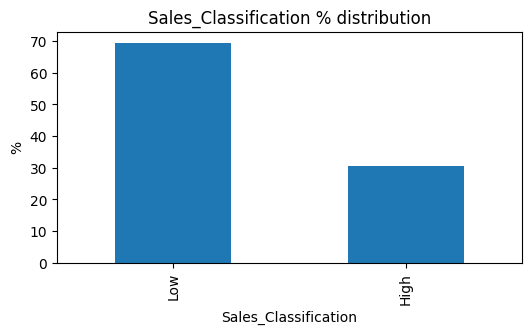

In [28]:
plt.figure(figsize=(6,3))
df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).plot.bar()
plt.title(f"{col} % distribution")
plt.ylabel('%')
plt.show()

<h2 style="text-align:center; color:#1f77b4;">
UNIVARIATE ANALYSIS (NUMERICAL)
</h2>

In [32]:
num_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Revenue']
print(df[num_cols].describe().T)

                 count          mean           std        min           25%  \
Year           50000.0  2.017016e+03  4.324459e+00     2010.0  2.013000e+03   
Engine_Size_L  50000.0  3.247180e+00  1.009078e+00        1.5  2.400000e+00   
Mileage_KM     50000.0  1.003072e+05  5.794151e+04        3.0  5.017800e+04   
Price_USD      50000.0  7.503460e+04  2.599825e+04    30000.0  5.243475e+04   
Sales_Volume   50000.0  5.067515e+03  2.856767e+03      100.0  2.588000e+03   
Revenue        50000.0  3.802449e+08  2.623406e+08  3410472.0  1.689871e+08   

                       50%           75%           max  
Year                2017.0  2.021000e+03  2.024000e+03  
Engine_Size_L          3.2  4.100000e+00  5.000000e+00  
Mileage_KM        100388.5  1.506302e+05  1.999960e+05  
Price_USD          75011.5  9.762825e+04  1.199980e+05  
Sales_Volume        5087.0  7.537250e+03  9.999000e+03  
Revenue        331800999.0  5.486494e+08  1.194346e+09  


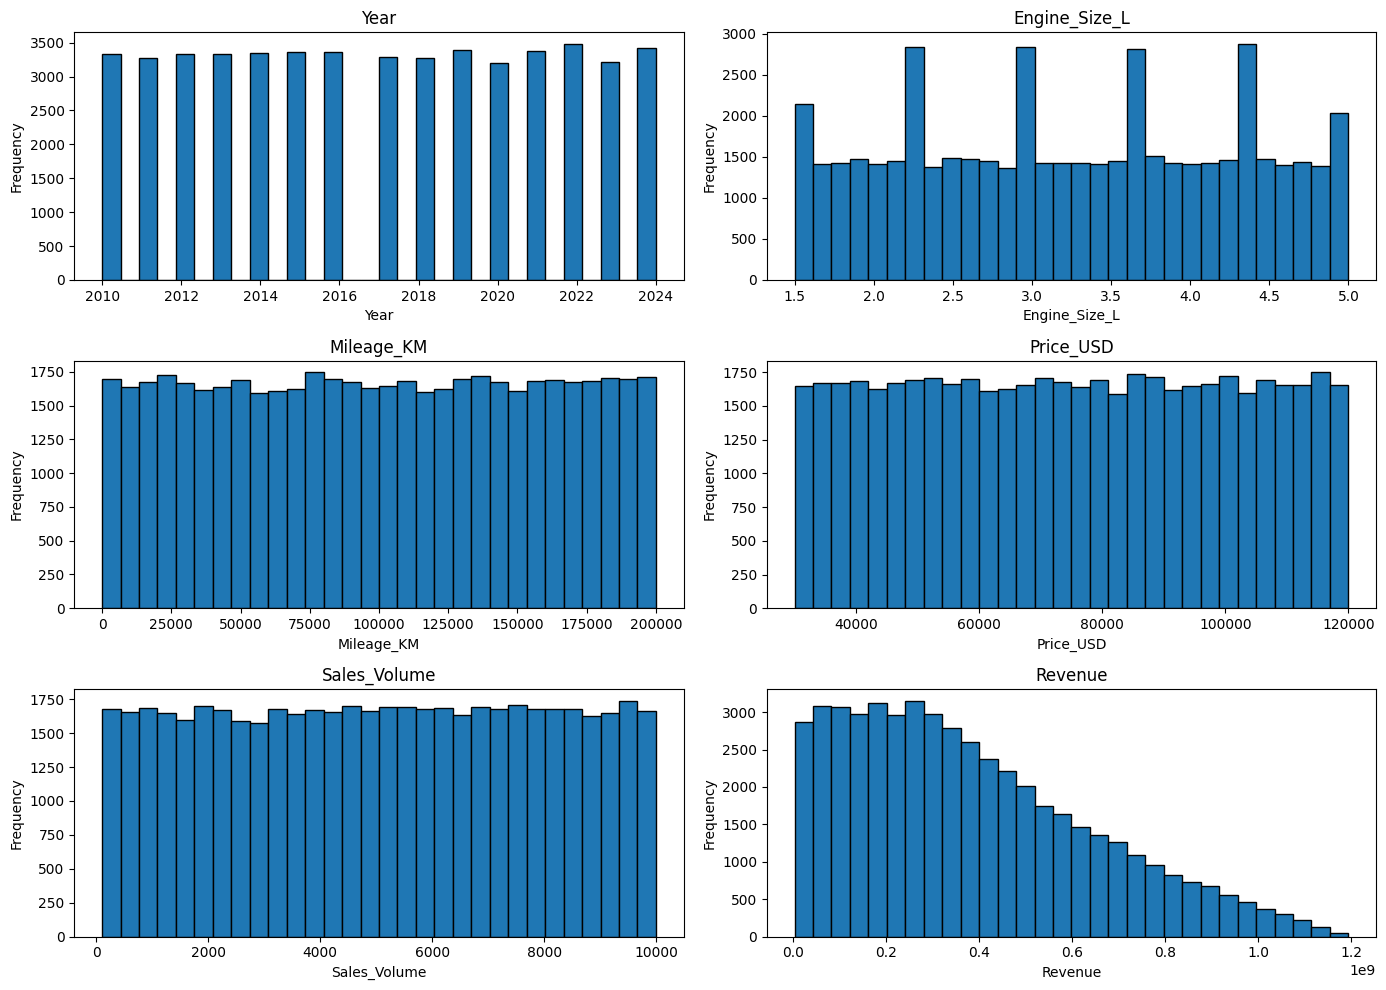

In [34]:
num_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 
            'Price_USD', 'Sales_Volume', 'Revenue']

plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

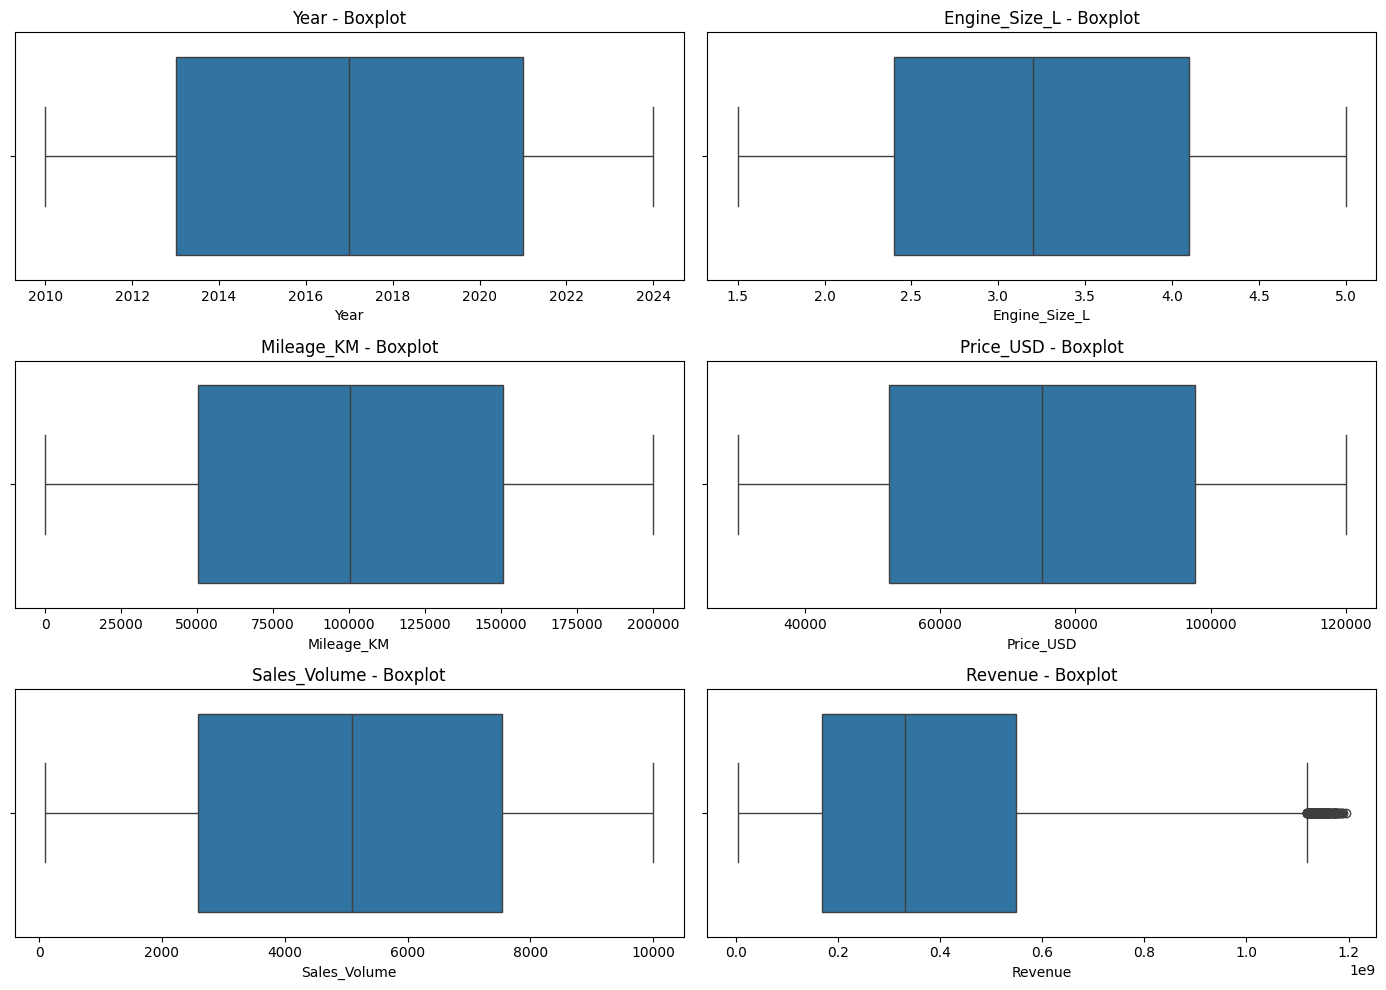

In [41]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()


<h3 style="text-align:center; color:#1f77b4;">
All numerical variables show clean and valid distributions.
Boxplots confirm the absence of unnatural or erroneous outliers in Year, Engine_Size_L, Mileage, Price, and Sales Volume.
The revenue data exhibits a natural right skew, with a few high-value points, which is expected because revenue is directly dependent on price and sales volume.
No numerical column requires winsorization or outlier removal.
</h3>

<h2 style="text-align:center; color:#1f77b4;">
BIVARIATE ANALYSIS
</h2>

<h3 style="text-align:left; color:#1f77b4;">
1. Model vs Average Revenue
</h3>

In [46]:
model_revenue = df.groupby('Model')['Revenue'].mean().sort_values(ascending = False)
model_revenue

Model
3 Series    3.848823e+08
7 Series    3.836413e+08
X1          3.835854e+08
i8          3.831401e+08
X5          3.808008e+08
X3          3.797979e+08
M5          3.792915e+08
X6          3.781651e+08
5 Series    3.779862e+08
M3          3.778619e+08
i3          3.733646e+08
Name: Revenue, dtype: float64

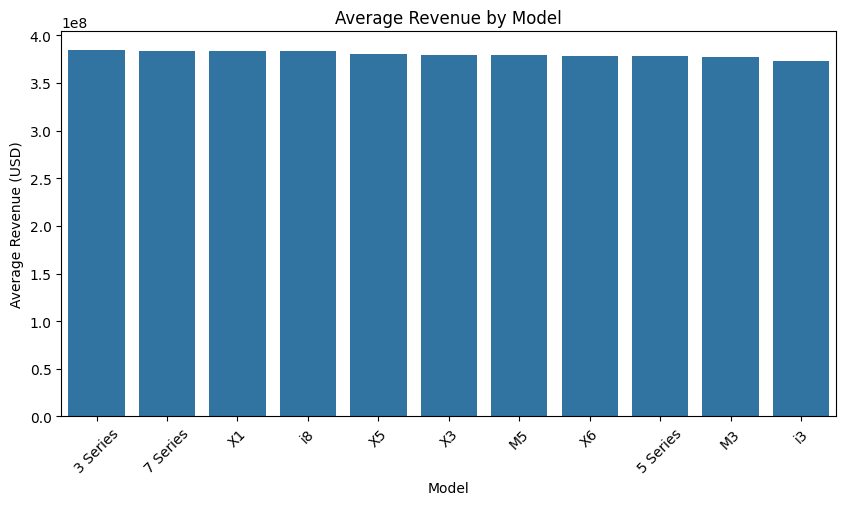

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x=model_revenue.index, y=model_revenue.values)
plt.xticks(rotation=45)
plt.title("Average Revenue by Model")
plt.ylabel("Average Revenue (USD)")
plt.xlabel("Model")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
2. Region vs Average Revenue
</h3>

In [48]:
region_revenue = df.groupby('Region')['Revenue'].mean().sort_values(ascending = False)
region_revenue

Region
Asia             3.845086e+08
Europe           3.825389e+08
North America    3.818763e+08
Middle East      3.783332e+08
South America    3.773852e+08
Africa           3.767114e+08
Name: Revenue, dtype: float64

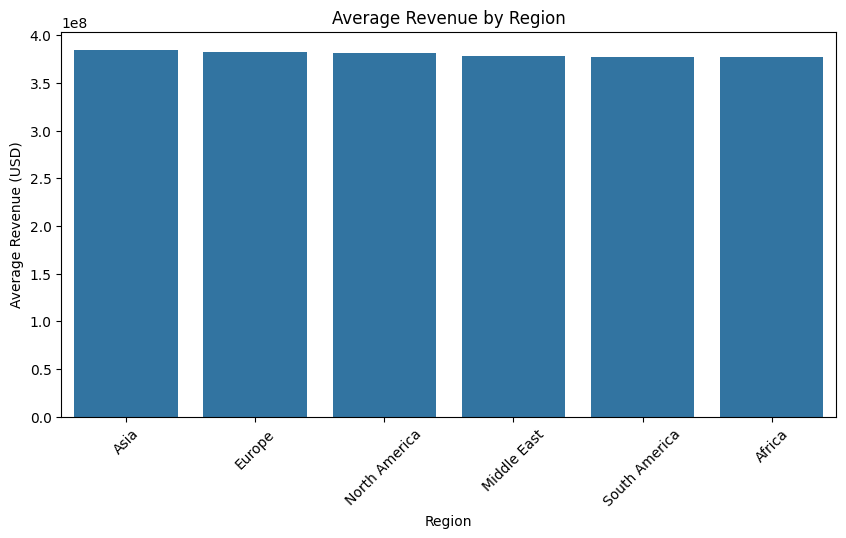

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Average Revenue by Region")
plt.ylabel("Average Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
3. Region vs Average Sales Volume
</h3>

In [51]:
region_sales = df.groupby('Region')['Sales_Volume'].mean().sort_values(ascending = False)
region_sales

Region
Europe           5106.208063
North America    5087.298020
Asia             5083.306955
Middle East      5055.131972
Africa           5036.380952
South America    5035.973579
Name: Sales_Volume, dtype: float64

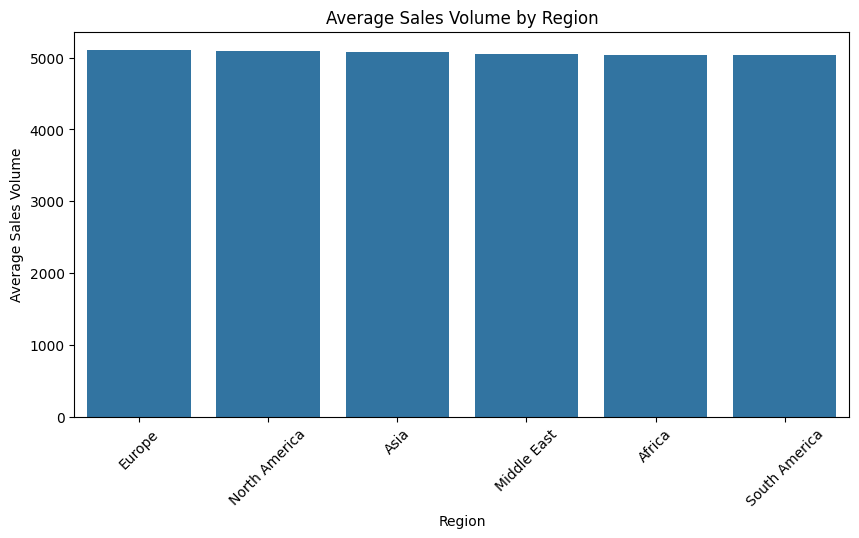

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Average Sales Volume by Region")
plt.ylabel("Average Sales Volume")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
4. Fuel Type vs Average Sales Volume
</h3>

In [53]:
fuel_sales = df.groupby('Fuel_Type')['Sales_Volume'].mean().sort_values(ascending = False)
fuel_sales

Fuel_Type
Diesel      5085.363940
Hybrid      5074.873938
Electric    5064.362521
Petrol      5045.749323
Name: Sales_Volume, dtype: float64

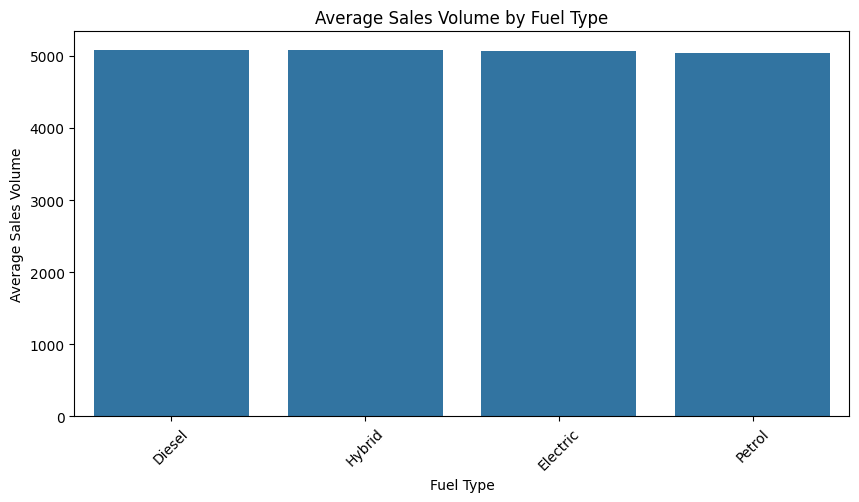

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x=fuel_sales.index, y=fuel_sales.values)
plt.title("Average Sales Volume by Fuel Type")
plt.ylabel("Average Sales Volume")
plt.xlabel("Fuel Type")
plt.xticks(rotation=45)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
5. Transmission vs Average Price
</h3>

In [58]:
tans_price = df.groupby('Transmission')['Price_USD'].mean().sort_values(ascending = False)
trans_price

Transmission
Automatic    75171.407631
Manual       74899.469309
Name: Price_USD, dtype: float64

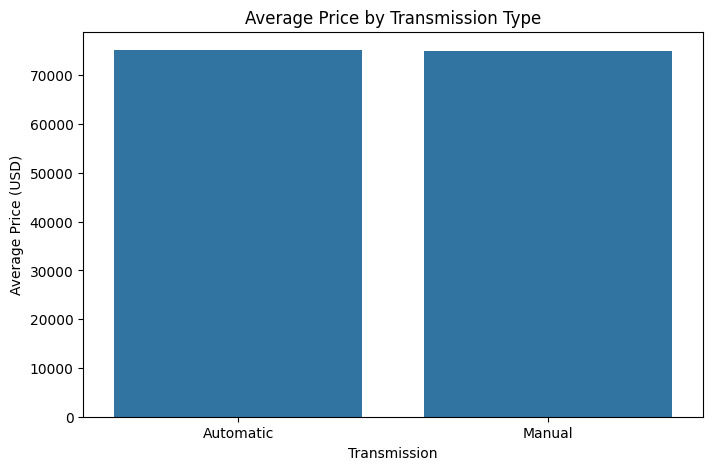

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x=trans_price.index, y=trans_price.values)
plt.title("Average Price by Transmission Type")
plt.ylabel("Average Price (USD)")
plt.xlabel("Transmission")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
6. Year vs Revenue (Trend)
</h3>

In [62]:
df.groupby("Year")["Revenue"].mean()

Year
2010    3.788683e+08
2011    3.840587e+08
2012    3.775031e+08
2013    3.784122e+08
2014    3.791015e+08
2015    3.737512e+08
2016    3.817658e+08
2017    3.803152e+08
2018    3.796417e+08
2019    3.801128e+08
2020    3.826998e+08
2021    3.773436e+08
2022    3.865520e+08
2023    3.803363e+08
2024    3.830779e+08
Name: Revenue, dtype: float64

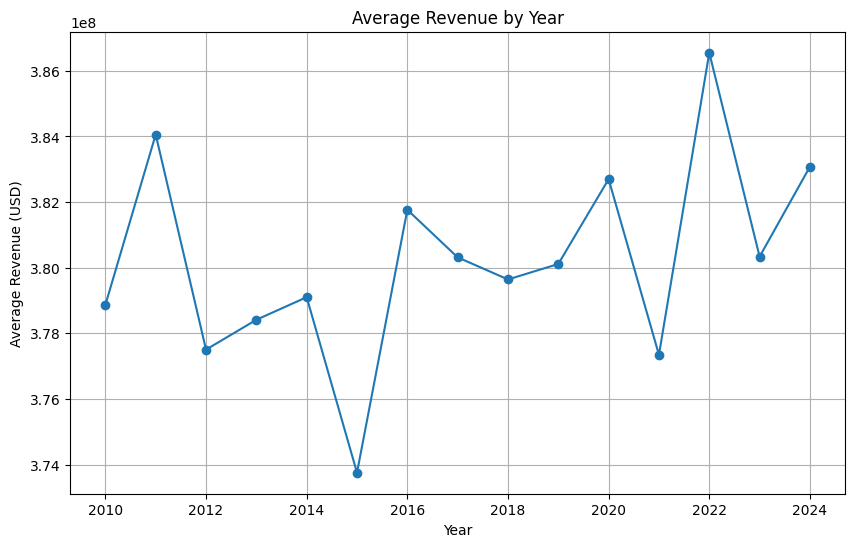

In [60]:
plt.figure(figsize=(10,6))
df.groupby("Year")["Revenue"].mean().plot(kind="line", marker="o")

plt.title("Average Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Average Revenue (USD)")
plt.grid(True)
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
7. Model vs Average Sales Volume
</h3>

In [66]:
df.groupby("Model")["Sales_Volume"].mean().sort_values(ascending = False)

Model
X1          5121.676149
7 Series    5097.828118
M5          5087.022778
i8          5085.516934
3 Series    5066.660065
M3          5064.512576
X5          5061.232226
X6          5060.738276
X3          5057.933956
5 Series    5029.947517
i3          5009.495236
Name: Sales_Volume, dtype: float64

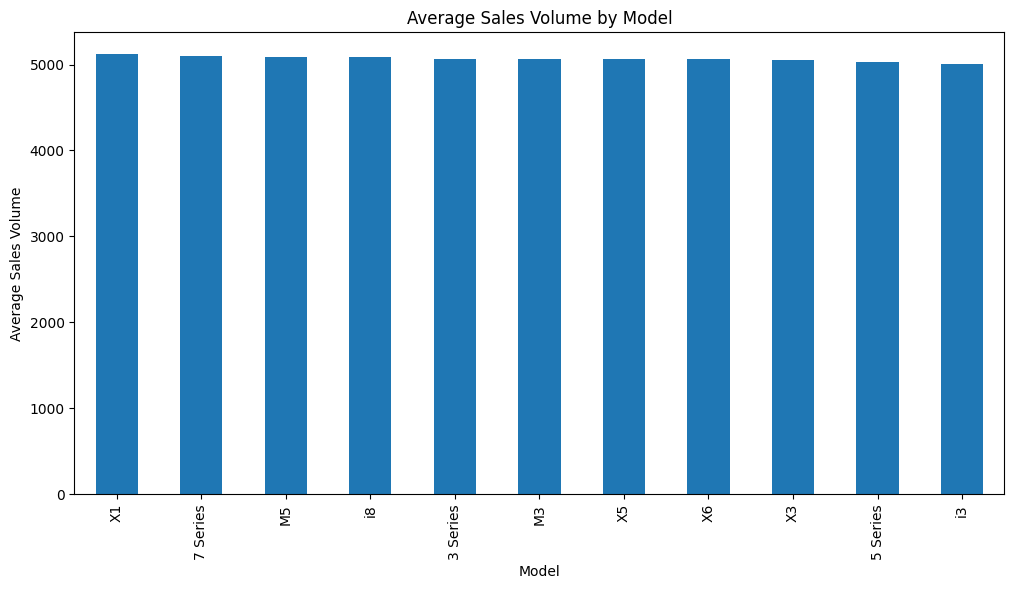

In [67]:
plt.figure(figsize=(12,6))
df.groupby("Model")["Sales_Volume"].mean().sort_values(ascending=False).plot(kind="bar")

plt.title("Average Sales Volume by Model")
plt.xlabel("Model")
plt.ylabel("Average Sales Volume")
plt.show()

<h2 style="text-align:center; color:#1f77b4;">
MULTIVARIATE ANALYSIS
</h2>

<h3 style="text-align:left; color:#1f77b4;">
1. Revenue by Model and Region
</h3>

In [80]:
pivot_rev = df.pivot_table(values = 'Revenue', index = 'Model', columns = 'Region', aggfunc = 'mean')
pivot_rev

Region,Africa,Asia,Europe,Middle East,North America,South America
Model,,,,,,
3 Series,3.964433e+08,3.946352e+08,3.981633e+08,3.768245e+08,3.860435e+08,3.577328e+08
5 Series,3.880061e+08,3.710154e+08,3.868692e+08,3.781227e+08,3.750395e+08,3.689430e+08
7 Series,3.771662e+08,3.878795e+08,3.799230e+08,3.807365e+08,3.979532e+08,3.776478e+08
M3,3.725383e+08,3.902594e+08,3.678979e+08,3.923785e+08,3.674542e+08,3.759850e+08
M5,3.487077e+08,3.822484e+08,3.854369e+08,3.875596e+08,3.713021e+08,4.010072e+08
X1,3.826777e+08,3.811035e+08,3.768391e+08,3.925006e+08,4.011804e+08,3.675736e+08
X3,3.870336e+08,3.950300e+08,3.717372e+08,3.616350e+08,3.767150e+08,3.874627e+08
X5,3.776964e+08,3.748936e+08,3.985778e+08,3.790771e+08,3.742986e+08,3.813513e+08
X6,3.752580e+08,3.779757e+08,3.824703e+08,3.702312e+08,3.739994e+08,3.889288e+08


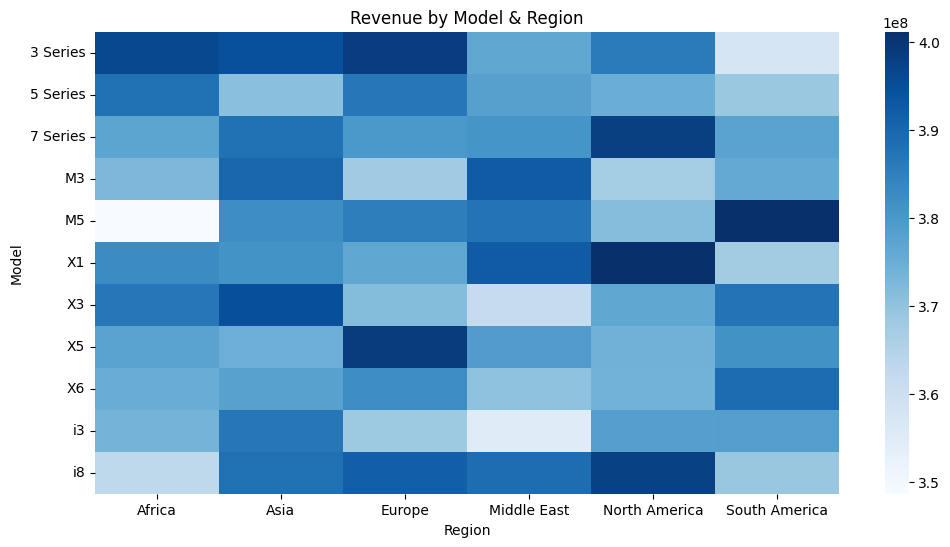

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_rev, annot=False, cmap="Blues")
plt.title("Revenue by Model & Region")
plt.xlabel("Region")
plt.ylabel("Model")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
2. Sales Volume by Fuel Type and Region
</h3>

In [84]:
pivot_fuel = df.pivot_table(values = 'Sales_Volume', index = 'Fuel_Type', columns = 'Region', aggfunc = 'mean')
pivot_fuel

Region,Africa,Asia,Europe,Middle East,North America,South America
Fuel_Type,,,,,,
Diesel,5060.292369,5066.167552,5076.162439,5071.028033,5099.355865,5139.559961
Electric,4997.138365,5176.770884,5040.487387,5080.740469,5103.946429,4988.123439
Hybrid,5012.444551,5112.979409,5096.827684,5053.409415,5074.498592,5096.902607
Petrol,5076.330925,4977.639391,5212.860126,5017.238051,5071.595642,4923.278070


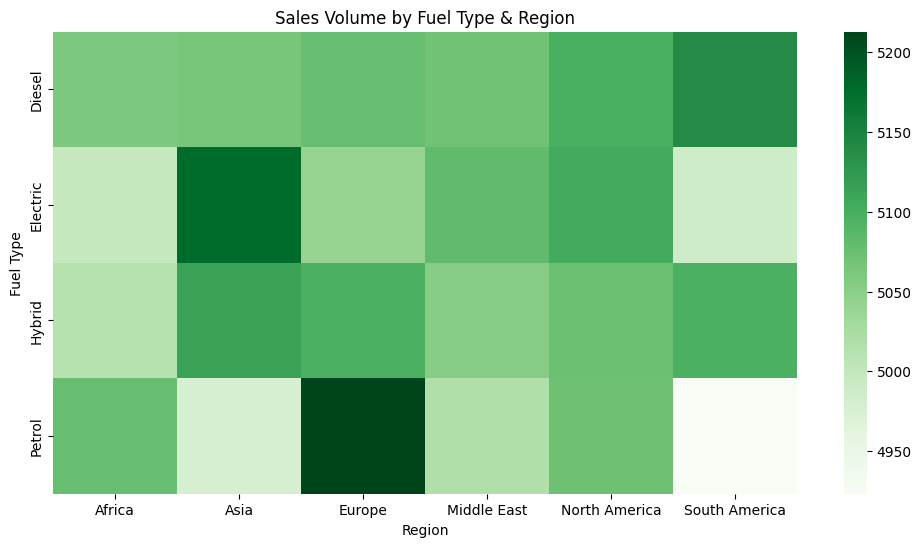

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_fuel, annot=False, cmap="Greens")
plt.title("Sales Volume by Fuel Type & Region")
plt.xlabel("Region")
plt.ylabel("Fuel Type")
plt.show()

<h3 style="text-align:left; color:#1f77b4;">
3. Price by Engine Size and Model
</h3>

In [86]:
pivot_engine_price = df.pivot_table(values = 'Price_USD', index = 'Model', columns = 'Engine_Size_L', aggfunc = 'mean')
pivot_engine_price

Engine_Size_L,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Model,,,,,,,,,,,,,,,,,,,,,
3 Series,76206.855263,70301.220690,74108.781818,75417.588235,75908.064286,78118.464286,75955.229508,78139.107692,75315.404412,73756.070175,...,76265.112782,75017.285714,74117.659574,73464.335766,70547.798561,77464.448529,79207.169231,72491.714286,78933.145631,75858.682540
5 Series,70705.145161,75018.631579,75272.464286,76646.015267,73378.335570,72381.033613,76611.024793,75620.198582,73873.985507,78057.915966,...,73951.294574,78889.598540,73391.620155,77396.888889,72439.752000,74758.515152,78860.129032,75956.571429,74349.661654,70432.656716
7 Series,74923.045455,78925.946970,76379.164286,70381.446970,74538.256410,74046.629630,75788.972973,76478.707317,73298.548673,75848.972789,...,76809.102041,73172.250000,70032.772059,77186.462121,73025.226950,76855.629310,80076.067797,75690.844444,74780.620155,66666.929577
M3,78823.966667,75520.195122,69214.904348,76003.840000,72893.363636,74969.139535,74124.710744,73643.122951,76742.467213,75264.762238,...,71999.914729,75812.804878,72091.079365,74703.916667,73673.472000,76856.804878,74809.853147,74176.577236,75144.219512,74690.274194
M5,73327.169014,73723.450000,75017.025000,73133.008403,74319.946154,74474.514925,77115.360248,71353.432203,72401.865546,72567.648649,...,76573.322314,76357.111111,77028.404580,74623.572519,74807.689189,72789.900000,71365.454545,72391.702479,70757.764706,75666.333333
X1,76265.028571,79541.565217,75868.233577,76150.939850,73468.977941,75317.514925,76238.537190,72922.326087,72140.633094,75443.854839,...,77984.683824,74042.635659,75141.028777,77287.992308,75936.673759,74659.758333,72671.256410,73536.112000,76062.042373,69866.084507
X3,75793.807018,72511.520548,78608.753623,72904.795082,79072.021583,77294.147059,78378.813433,72618.966942,72096.427184,76823.311111,...,79430.417323,73395.963964,73675.858333,79775.061404,71157.661290,77271.109489,75645.000000,74714.743802,76016.237037,67602.538462
X5,69554.686275,72947.538462,76564.854167,72529.426573,73237.893443,73679.725664,77391.000000,73701.325758,69462.791367,74447.000000,...,73629.421053,76138.429448,78752.213675,78299.959016,70856.167883,74493.353448,75369.795082,69822.773109,81687.721739,79503.030303
X6,75442.492537,75090.855856,72125.846154,69881.902985,76993.531250,72830.904000,76794.765217,78167.637931,77974.255639,76107.230769,...,72204.190083,76419.707692,77220.870968,72962.242857,71694.516667,71930.938596,77335.438462,75708.467153,72065.292035,74181.200000


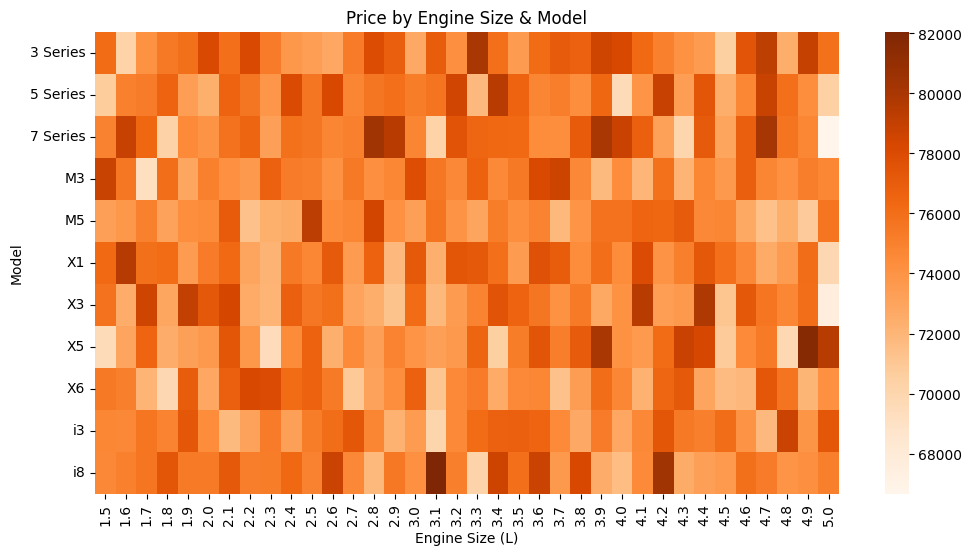

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_engine_price, annot=False, cmap="Oranges")
plt.title("Price by Engine Size & Model")
plt.xlabel("Engine Size (L)")
plt.ylabel("Model")
plt.show()

<h2 style="text-align:center; color:#1f77b4;">
CORRELATION ANALYSIS
</h2>

In [82]:
print(df.corr(numeric_only = True))

                   Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
Year           1.000000      -0.001944    0.008741   0.003547      0.001671   
Engine_Size_L -0.001944       1.000000   -0.004906   0.000146     -0.003942   
Mileage_KM     0.008741      -0.004906    1.000000  -0.004238      0.001434   
Price_USD      0.003547       0.000146   -0.004238   1.000000      0.000080   
Sales_Volume   0.001671      -0.003942    0.001434   0.000080      1.000000   
Revenue        0.004198      -0.002094   -0.000398   0.503798      0.816078   

                Revenue  
Year           0.004198  
Engine_Size_L -0.002094  
Mileage_KM    -0.000398  
Price_USD      0.503798  
Sales_Volume   0.816078  
Revenue        1.000000  


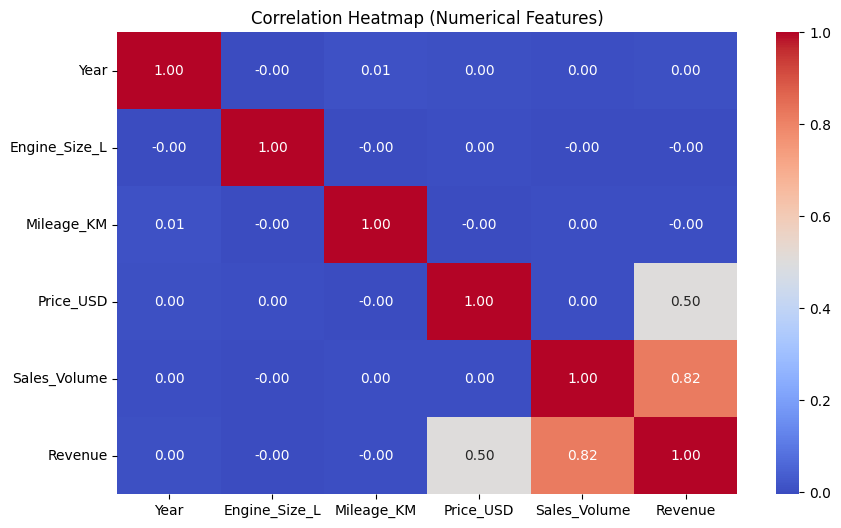

In [83]:
plt.figure(figsize = (10,6))
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show() 